In [126]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [157]:
#导入数据
house_data = pd.read_csv("data.csv")


In [158]:
data = pd.DataFrame(house_data)

In [131]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [133]:
data['price']     = data['price'].astype('int64')
data['bedrooms']  = data['bedrooms'].astype('int64')
data['bathrooms'] = data['bathrooms'].astype('int64')
data['floors']    = data['floors'].astype('int64')
data['street']    = data['street'].astype('string')
data['city']      = data['city'].astype('string')
data['statezip']  = data['statezip'].astype('string')
data['country']   = data['country'].astype('string')

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int64 
 2   bedrooms       4600 non-null   int64 
 3   bathrooms      4600 non-null   int64 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int64 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   string
 15  city           4600 non-null   string
 16  statezip       4600 non-null   string
 17  country        4600 non-null   string
dtypes: int64(13), object(1), str

In [135]:
data.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [136]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.0,4.00,9.0
bathrooms,4600.0,1.788913,0.752185,0.0,1.00,2.0,2.00,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.0,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,1.459130,0.552194,1.0,1.00,1.0,2.00,3.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.0,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.0,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.0,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.0,2300.00,9410.0


In [137]:
(data.price == 0).sum()

49

In [138]:
#将price=0的行替换成Null
data['price'].replace(0, np.nan, inplace = True)

In [139]:
data.isnull().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [140]:
data.dropna(inplace=True)
(data.price == 0).sum()

0

In [141]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.885959,563929.874935,7800.0,326264.0,465000.0,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.0,3.0,4.0,9.0
bathrooms,4551.0,1.782905,0.744431,0.0,1.0,2.0,2.0,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.0,1970.0,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.0,7680.0,10978.0,1074218.0
floors,4551.0,1.459240,0.552355,1.0,1.0,1.0,2.0,3.0
waterfront,4551.0,0.006592,0.080932,0.0,0.0,0.0,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.0,0.0,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.0,3.0,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.0,1590.0,2300.0,9410.0


In [142]:
#将data改成datatime
data['date'] = pd.to_datetime(data['date'])
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.0,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333.0,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904.0,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,203400.0,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [143]:
#插入year
data.insert(1, "year", data.date.dt.year)
data.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [144]:
#每一页不同值的数量
data.nunique(axis = 0) 

date               70
year                1
price            1740
bedrooms           10
bathrooms           8
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

# 可视化

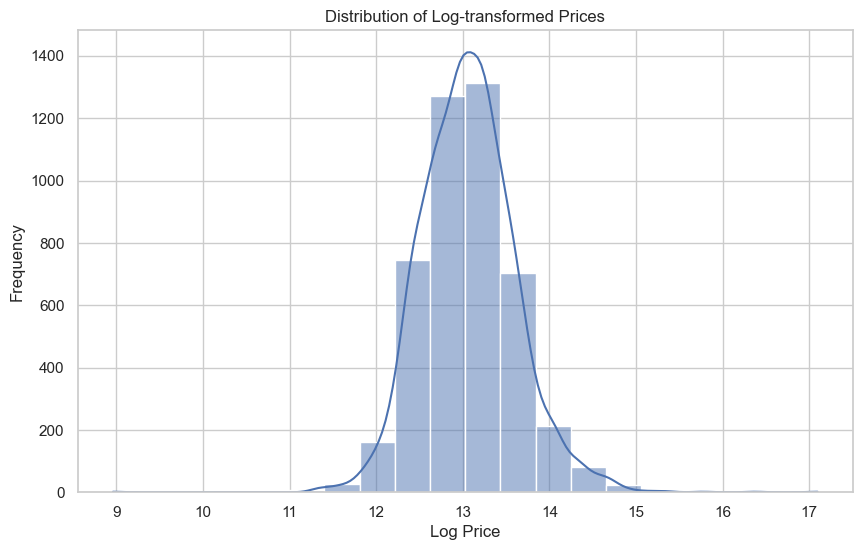

In [163]:
import numpy as np

# Manually apply a logarithmic transformation to the price data
log_prices = np.log(data['price'][data['price'] > 0])

# Redrawing the histogram with logarithmic transformation of prices with English labels
plt.figure(figsize=(10, 6))
sns.histplot(log_prices, bins=20, kde=True)
plt.title('Distribution of Log-transformed Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#city的可视化表格

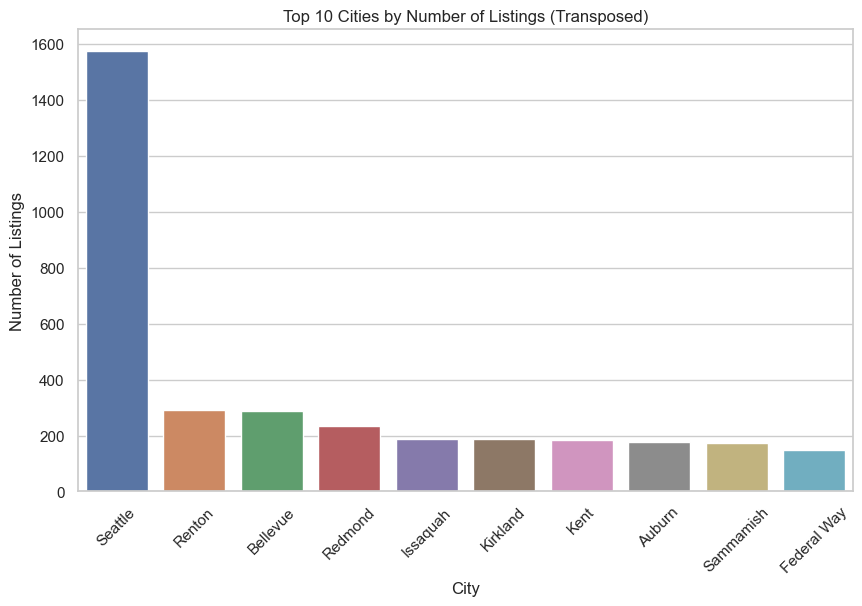

In [168]:
# Redefine 'city_counts' to ensure it's defined in the current scope
city_counts = data['city'].value_counts().nlargest(10)

# Redrawing the visualization for 'city' with the top 10 cities by number of listings, transposed
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Top 10 Cities by Number of Listings (Transposed)')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

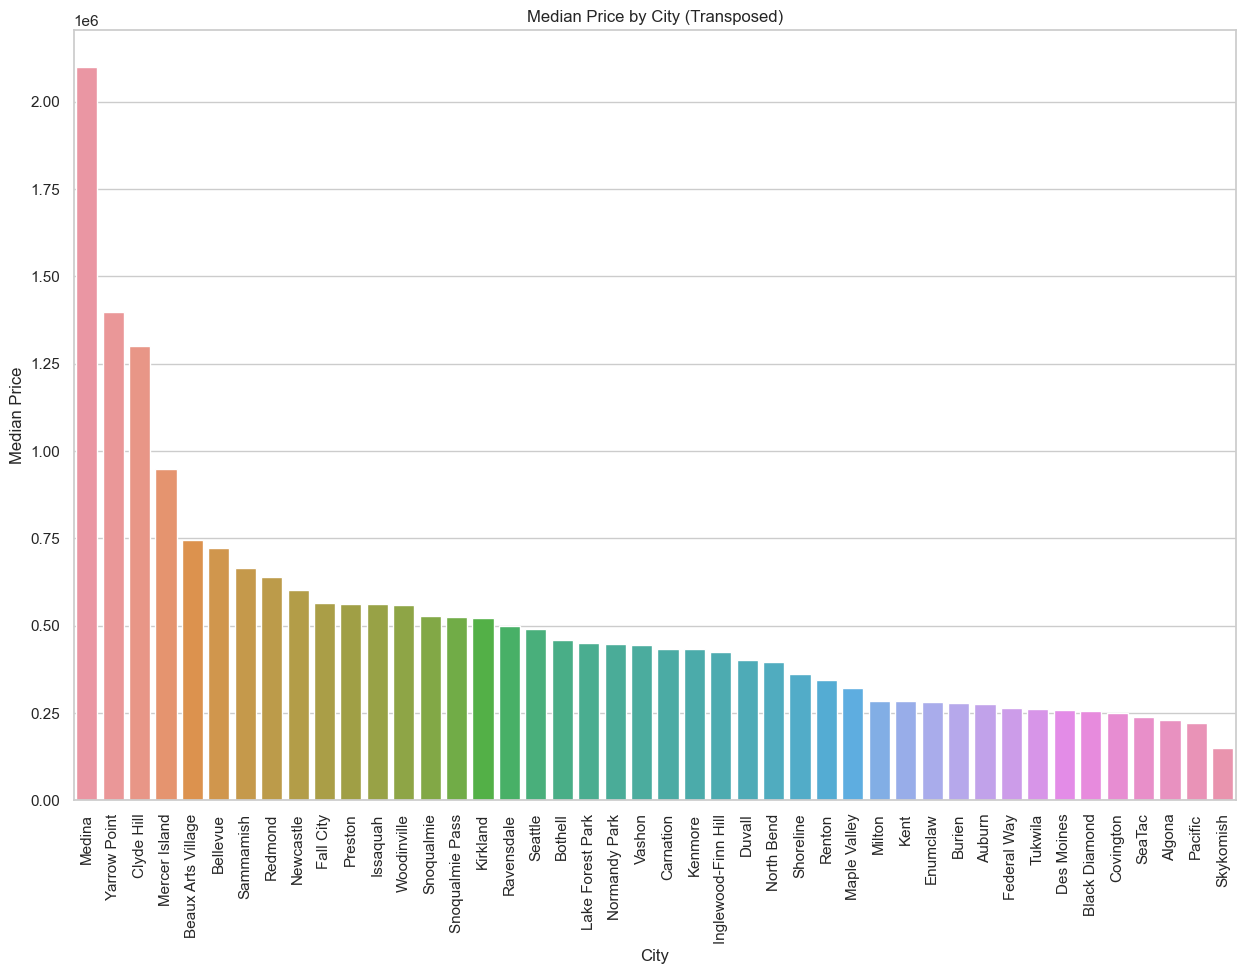

In [170]:
# Calculating the median price for each city for a clearer representation
median_price_per_city = data.groupby('city')['price'].median().sort_values(ascending=False)

# Plotting the median price for each city, transposed
plt.figure(figsize=(15, 10))
sns.barplot(y=median_price_per_city.values, x=median_price_per_city.index)
plt.title('Median Price by City (Transposed)')
plt.ylabel('Median Price')
plt.xlabel('City')
plt.xticks(rotation=90)  # Rotate city names for better visibility
plt.show()

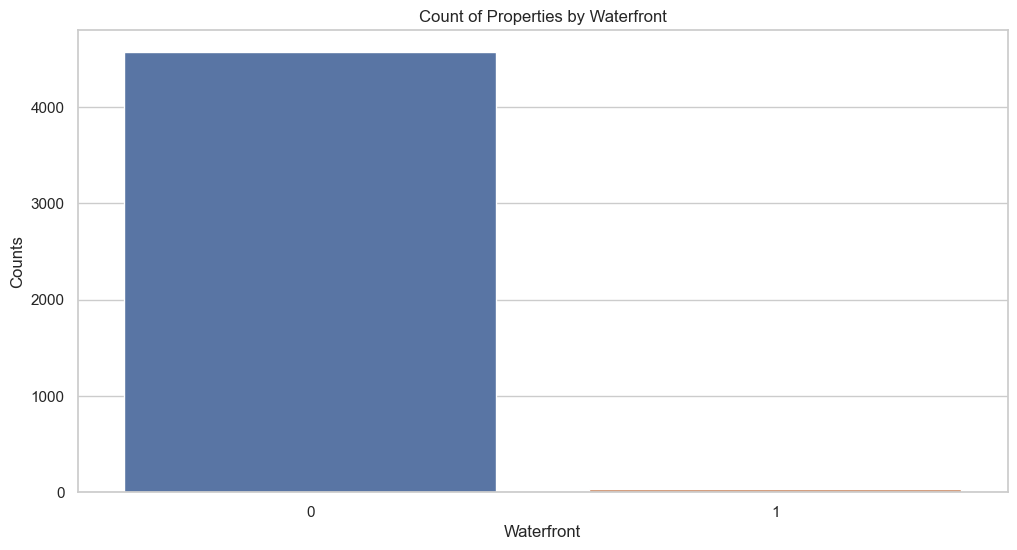

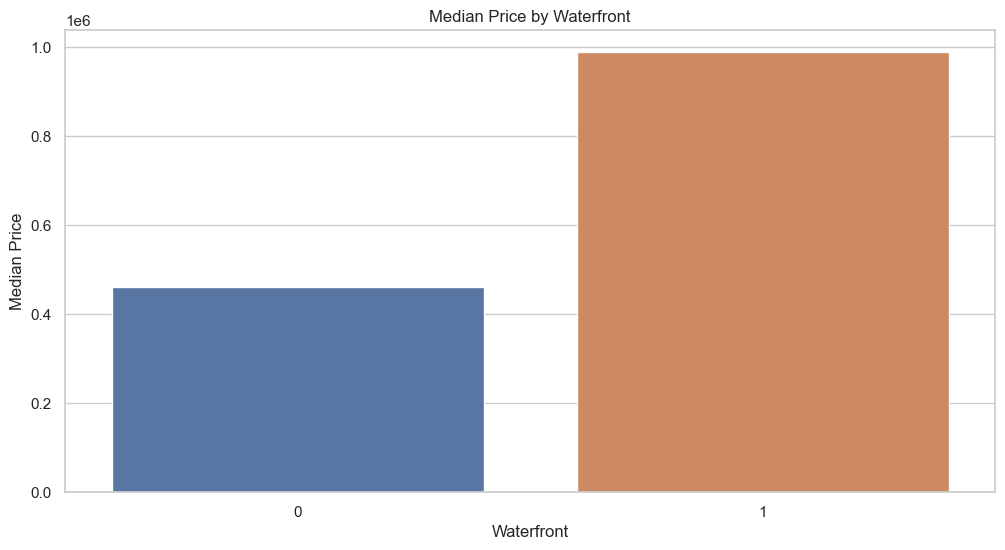

In [171]:
#water front可视化
# First plot: Waterfront vs Counts
plt.figure(figsize=(12, 6))
sns.countplot(x=data['waterfront'])
plt.title('Count of Properties by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Counts')
plt.show()

# Second plot: Waterfront vs Median Price
median_price_per_waterfront = data.groupby('waterfront')['price'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='waterfront', y='price', data=median_price_per_waterfront)
plt.title('Median Price by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Median Price')
plt.show()


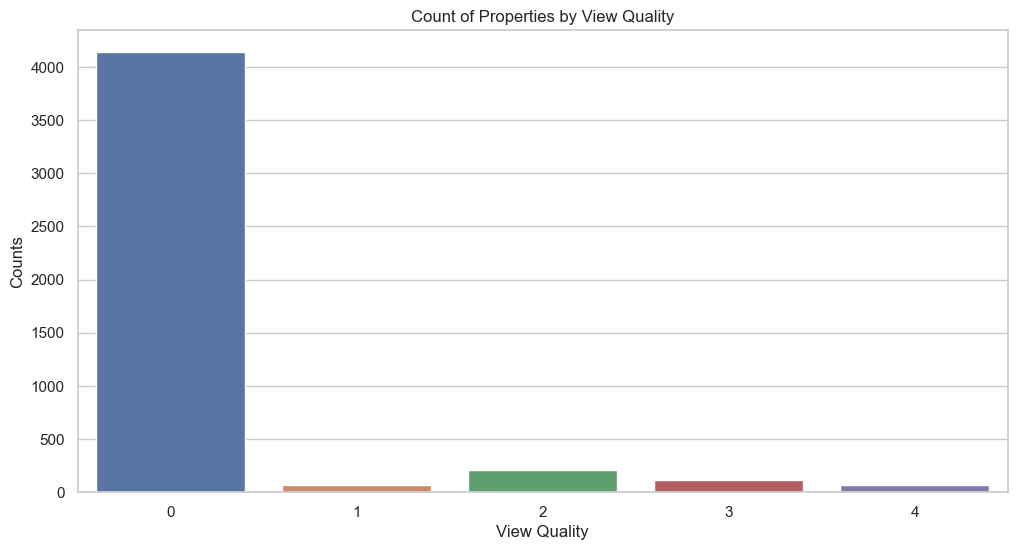

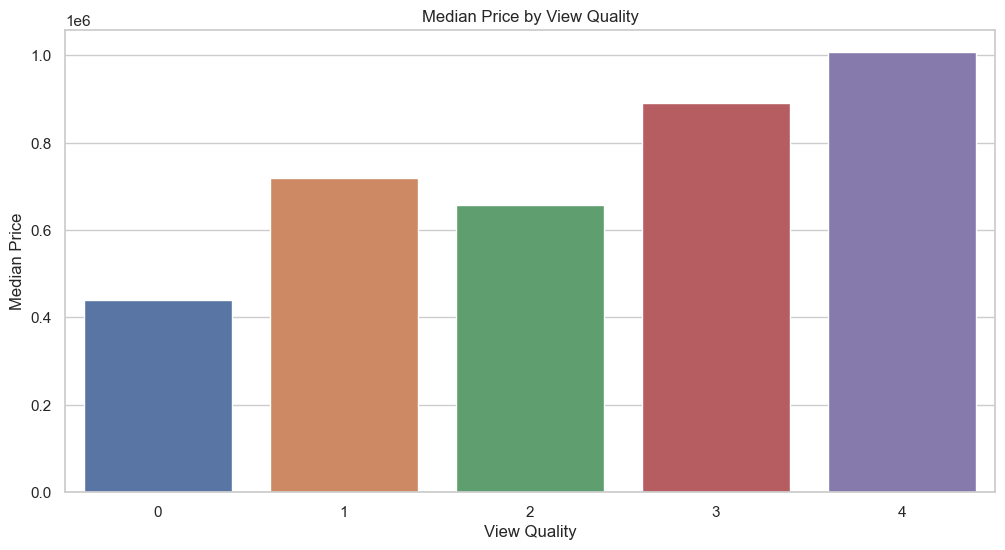

In [172]:
# First plot: View vs Counts
plt.figure(figsize=(12, 6))
sns.countplot(x=data['view'])
plt.title('Count of Properties by View Quality')
plt.xlabel('View Quality')
plt.ylabel('Counts')
plt.show()

# Second plot: View vs Median Price
median_price_per_view = data.groupby('view')['price'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='view', y='price', data=median_price_per_view)
plt.title('Median Price by View Quality')
plt.xlabel('View Quality')
plt.ylabel('Median Price')
plt.show()

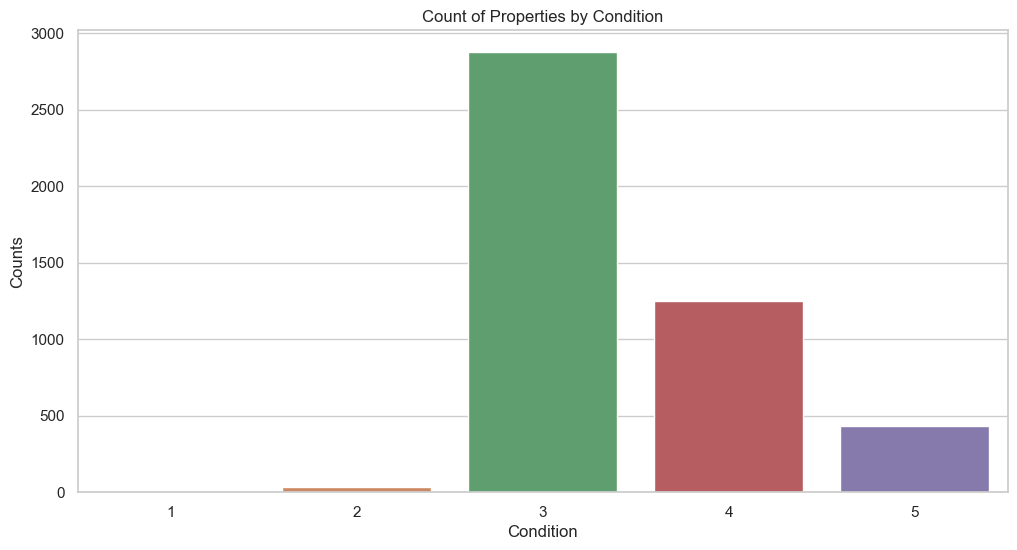

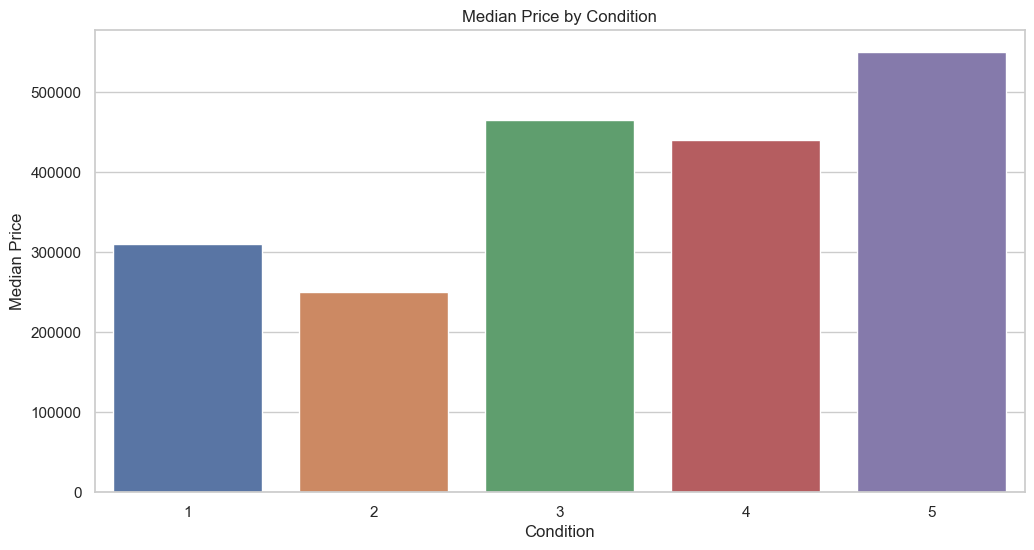

In [173]:
# First plot: Condition vs Counts
plt.figure(figsize=(12, 6))
sns.countplot(x=data['condition'])
plt.title('Count of Properties by Condition')
plt.xlabel('Condition')
plt.ylabel('Counts')
plt.show()

# Second plot: Condition vs Median Price
median_price_per_condition = data.groupby('condition')['price'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='condition', y='price', data=median_price_per_condition)
plt.title('Median Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Median Price')
plt.show()

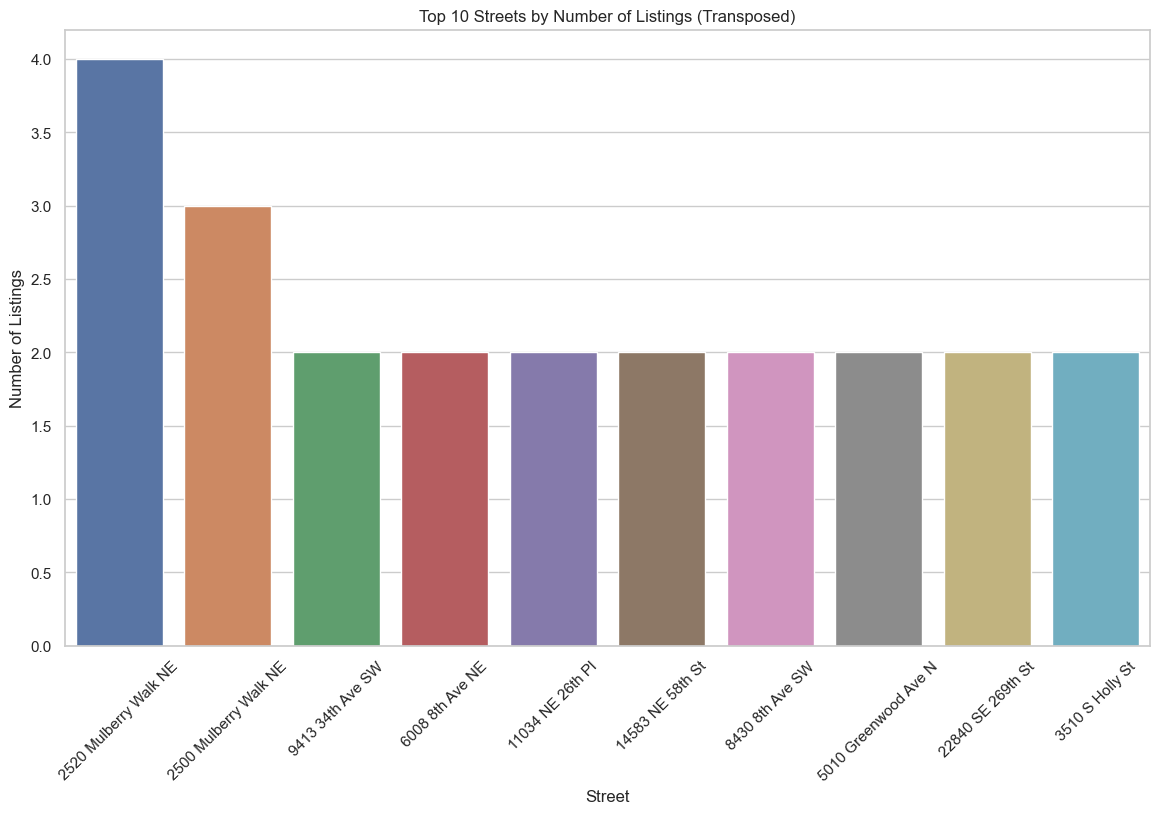

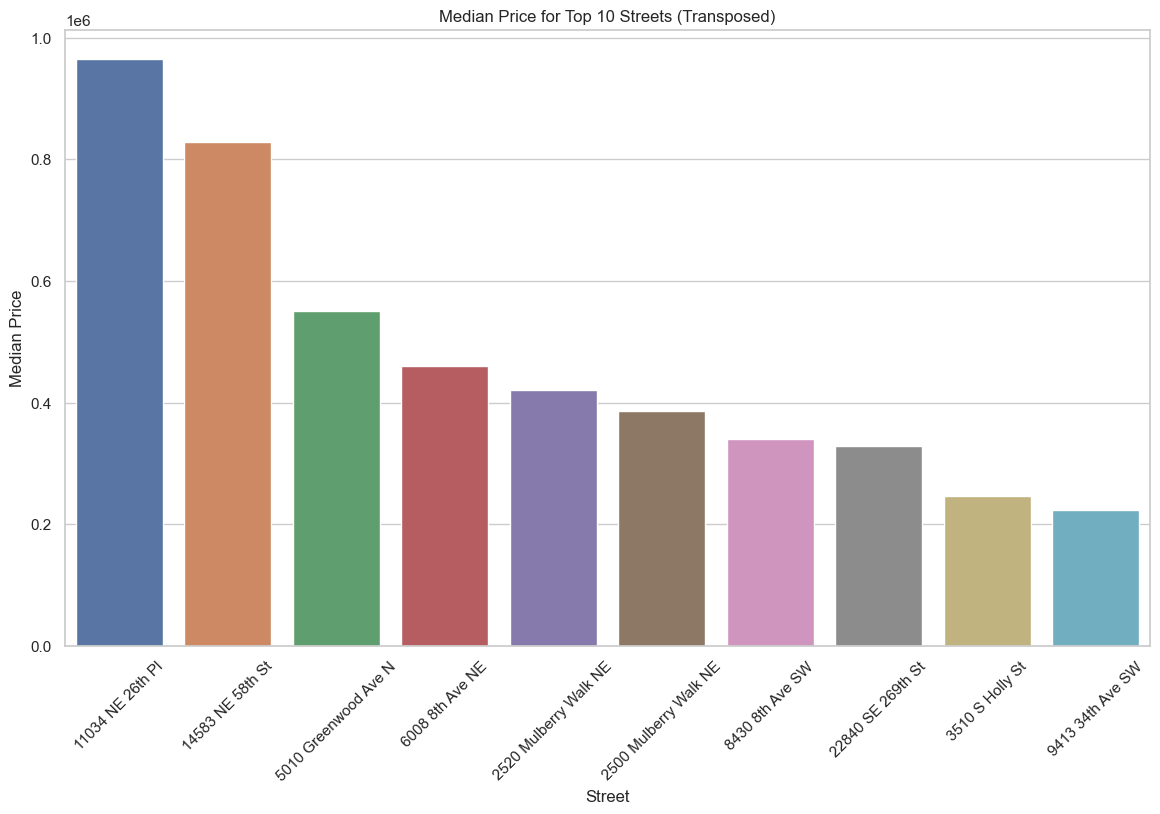

In [175]:
# Adjusting the plots to display streets along the x-axis

# Plotting the number of listings for the top streets transposed
plt.figure(figsize=(14, 8))
sns.barplot(x=top_streets_count.index, y=top_streets_count.values)
plt.xticks(rotation=45)
plt.title('Top 10 Streets by Number of Listings (Transposed)')
plt.ylabel('Number of Listings')
plt.xlabel('Street')
plt.show()

# Plotting the median prices for the top streets transposed
plt.figure(figsize=(14, 8))
sns.barplot(x=median_price_per_street.index, y=median_price_per_street.values)
plt.xticks(rotation=45)
plt.title('Median Price for Top 10 Streets (Transposed)')
plt.ylabel('Median Price')
plt.xlabel('Street')
plt.show()


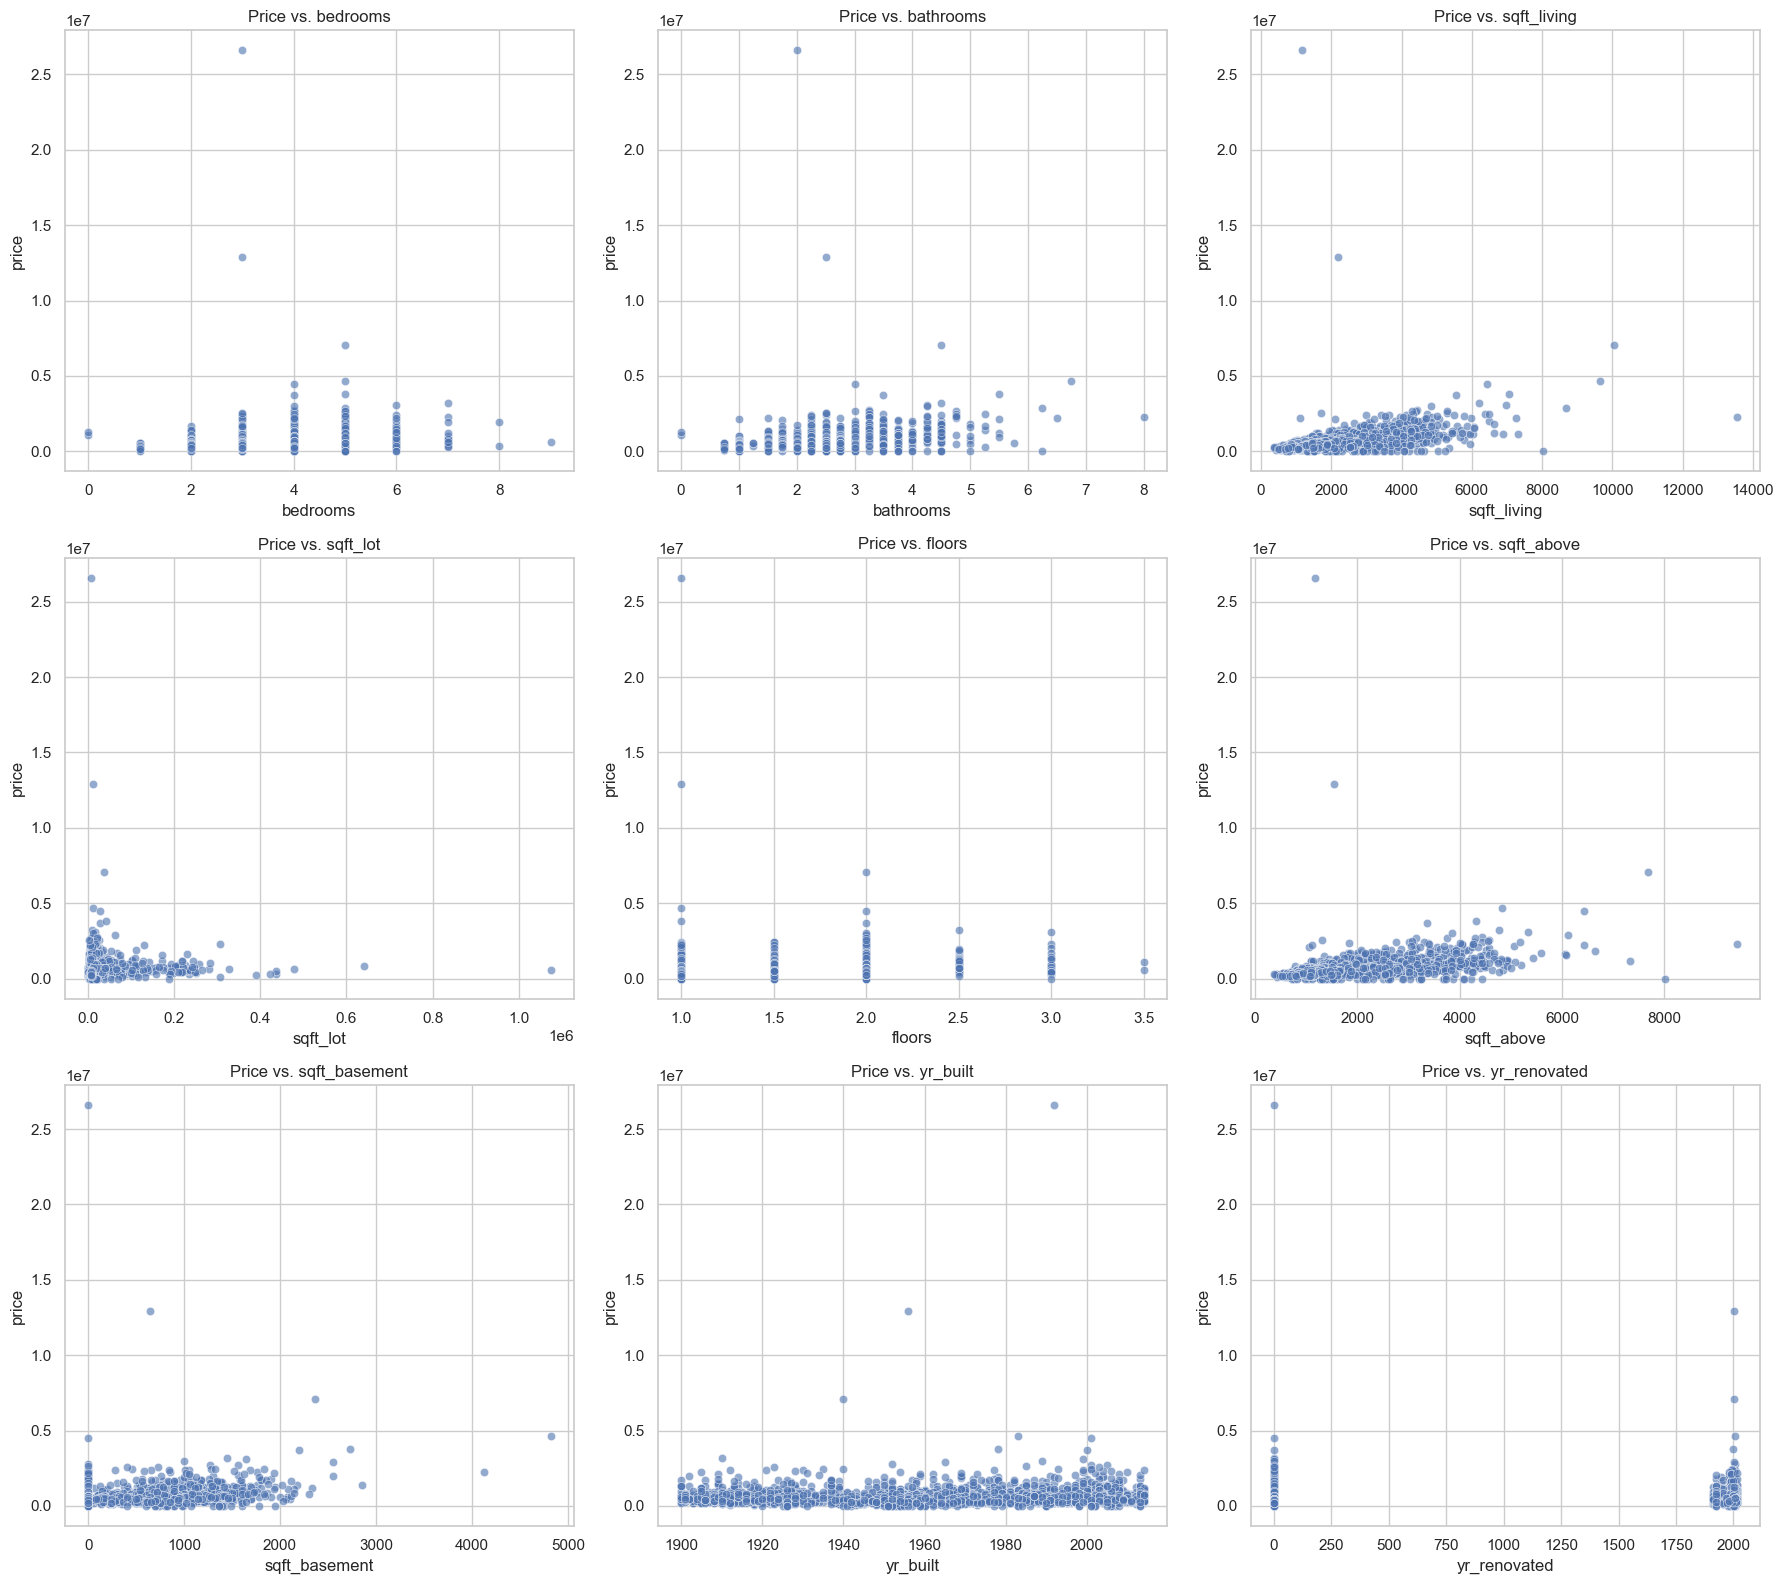

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of numerical variables
numerical_vars = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
    'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'
]

# Setting up the figure
plt.figure(figsize=(18, 16))

# Creating subplots for each numerical variable
for i, var in enumerate(numerical_vars):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=data, x=var, y='price', alpha=0.6)
    plt.title(f'Price vs. {var}')
    plt.tight_layout()

plt.show()


In [145]:
data.corr()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.210228,0.331917,0.445494,0.051347,0.138342,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,NaN,0.210228,1.000000,0.499640,0.596053,0.071138,0.154922,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,NaN,0.331917,0.499640,1.000000,0.706352,0.111565,0.466471,0.056590,0.196671,-0.118957,0.645209,0.268266,0.394298,-0.188182
sqft_living,NaN,0.445494,0.596053,0.706352,1.000000,0.213268,0.339348,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,NaN,0.051347,0.071138,0.111565,0.213268,1.000000,-0.005019,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,NaN,0.138342,0.154922,0.466471,0.339348,-0.005019,1.000000,0.010928,0.022631,-0.305362,0.516264,-0.252654,0.561159,-0.248916
waterfront,NaN,0.150083,-0.005521,0.056590,0.107758,0.017408,0.010928,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,NaN,0.242587,0.115080,0.196671,0.309343,0.072527,0.022631,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,NaN,0.038892,0.023018,-0.118957,-0.062529,0.000929,-0.305362,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483


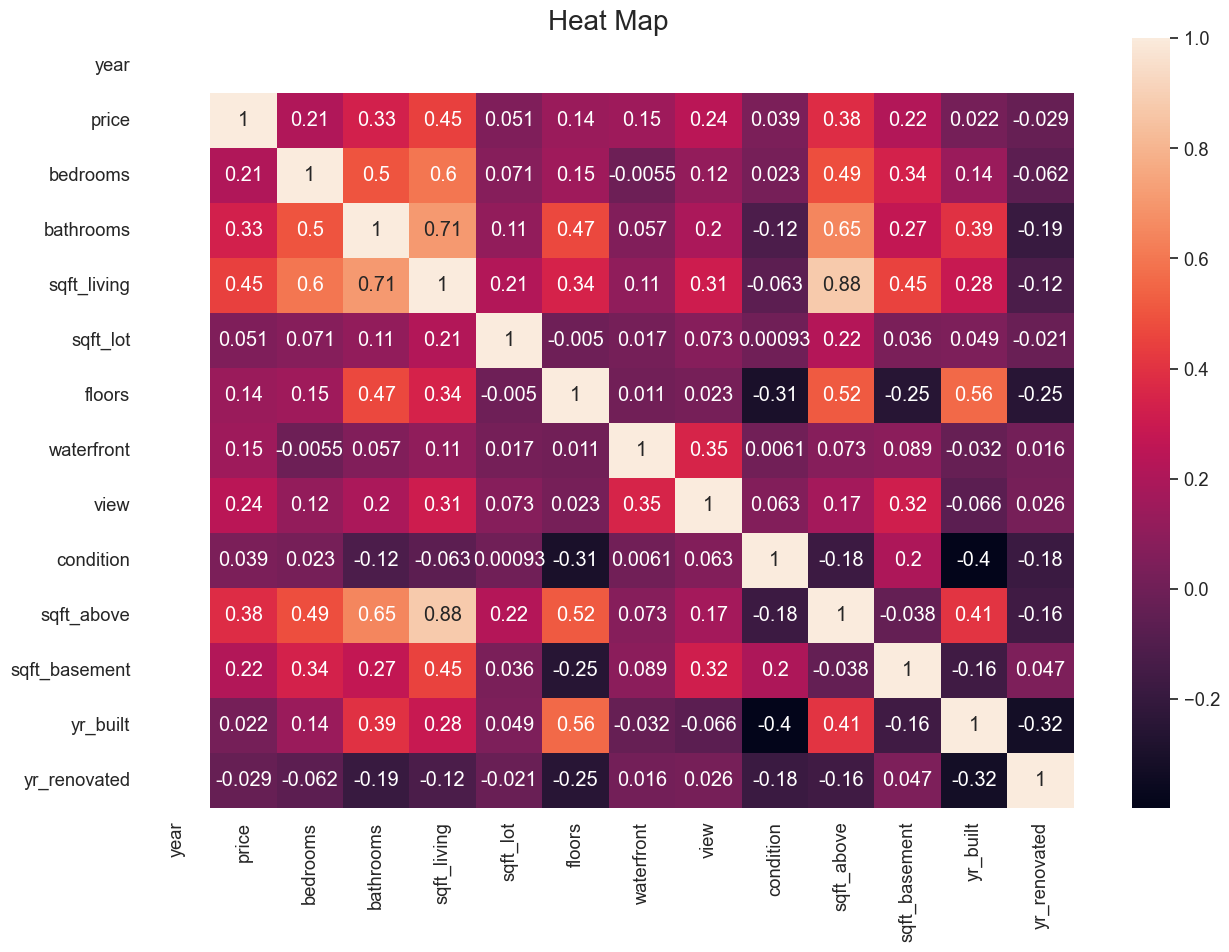

In [146]:
# draw Heat Map 

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

# normalize


In [147]:
columns = house.columns

In [148]:
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
normal = pd.DataFrame(scaler.fit_transform(house), columns = columns)
normal.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.011481,0.333333,0.125,0.073652,0.006775,0.0,0.0,0.0,0.50,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.089391,0.555556,0.250,0.249051,0.007835,0.5,0.0,1.0,1.00,0.058091,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.012572,0.333333,0.250,0.118451,0.010534,0.0,0.0,0.0,0.75,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.015507,0.333333,0.250,0.123766,0.006885,0.0,0.0,0.0,0.75,0.207469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.020397,0.444444,0.250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.165975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.018140,0.222222,0.125,0.038724,0.005348,0.0,0.0,0.0,0.50,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.012309,0.222222,0.250,0.074412,0.001790,0.0,0.0,0.0,0.50,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.017839,0.444444,0.250,0.177677,0.032815,0.5,0.0,0.0,0.50,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.016729,0.333333,0.250,0.156416,0.081771,0.0,0.0,0.0,0.75,0.178423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.023783,0.444444,0.250,0.087320,0.005181,0.0,0.0,0.0,0.50,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# model

In [149]:
x = normal.drop("price", axis=1)
y = pd.DataFrame(normal["price"])

In [150]:
nbrs = NearestNeighbors(n_neighbors=3).fit(x)
neigh_dist, neigh_ind = nbrs.kneighbors(x)
sort_neigh_dist = np.sort(neigh_dist, axis=0)

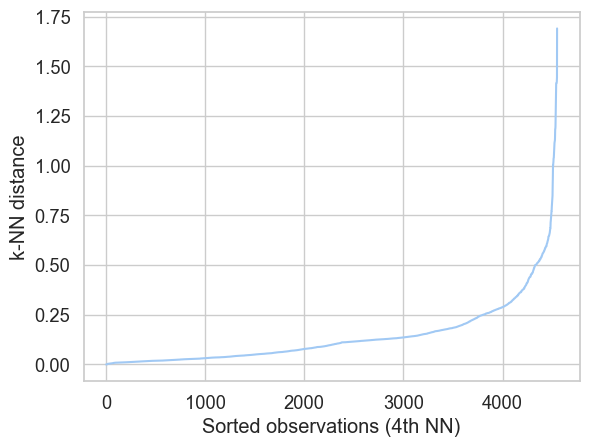

In [151]:
k_dist = sort_neigh_dist[:, 2]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [152]:
clusters = DBSCAN(eps=0.9, min_samples=3).fit(x)
clusters.labels_

array([ 0,  1,  2, ..., 24,  1, 35])

In [153]:
x["noise"] = clusters.labels_
y["noise"] = clusters.labels_

In [154]:
x = x[x.noise>-1]
y = y[y.noise>-1]
x.drop('noise', inplace = True, axis=1)
y.drop('noise', inplace = True, axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =43 )

In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# X_train, Y_train 
# X_test, Y_test 

# 初始化随机森林回归模型
# n_estimators 参数表示树的数量
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_regressor.fit(X_train, Y_train)

# 使用模型进行预测
Y_pred = rf_regressor.predict(X_test)

# 计算均方误差（MSE）和均方根误差（RMSE）
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"模型的均方误差（MSE）为: {mse}")
print(f"模型的均方根误差（RMSE）为: {rmse}")


模型的均方误差（MSE）为: 6.891943108599276e-05
模型的均方根误差（RMSE）为: 0.008301772767667925


In [1]:
# Calculate the Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE)
mse = 6.891943108599276e-05
rmse = 0.008301772767667925

# Output the results in English
print(f"Model's Mean Squared Error (MSE) is: {mse}")
print(f"Model's Root Mean Squared Error (RMSE) is: {rmse}")


Model's Mean Squared Error (MSE) is: 6.891943108599276e-05
Model's Root Mean Squared Error (RMSE) is: 0.008301772767667925


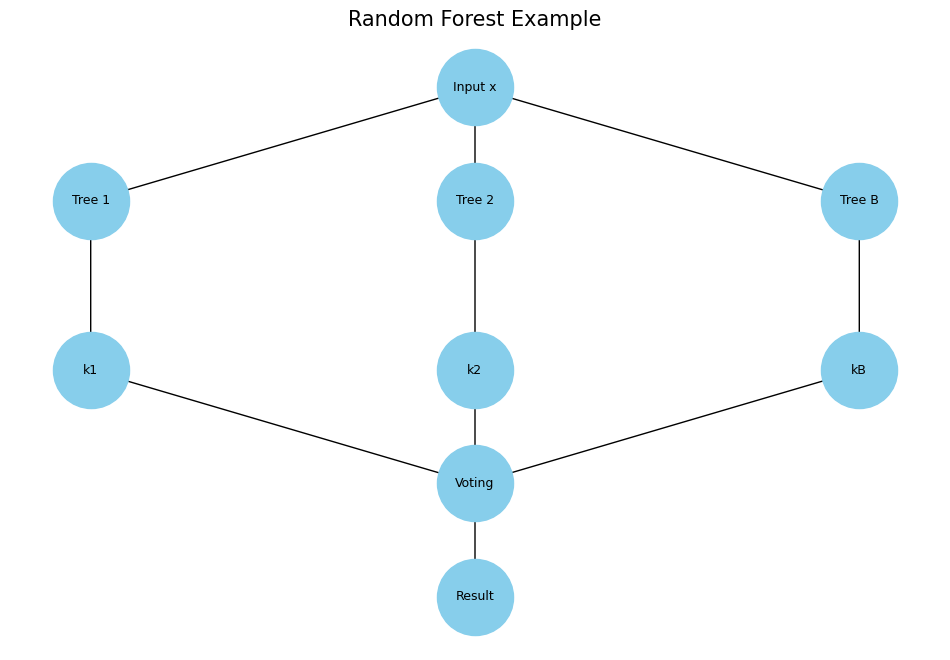

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# 创建一个有向图
G = nx.DiGraph()

# 添加节点和边
nodes = {
    'x': {'pos': (0, 5), 'label': 'Input x'},
    'tree1': {'pos': (-6, 3), 'label': 'Tree 1'},
    'k1': {'pos': (-6, 0), 'label': 'k1'},
    'tree2': {'pos': (0, 3), 'label': 'Tree 2'},
    'k2': {'pos': (0, 0), 'label': 'k2'},
    'treeB': {'pos': (6, 3), 'label': 'Tree B'},
    'kb': {'pos': (6, 0), 'label': 'kB'},
    'voting': {'pos': (0, -2), 'label': 'Voting'},
    'result': {'pos': (0, -4), 'label': 'Result'}
}

# 添加节点
for node, attr in nodes.items():
    G.add_node(node, pos=attr['pos'], label=attr['label'])

# 添加边
edges = [
    ('x', 'tree1'), ('x', 'tree2'), ('x', 'treeB'), 
    ('tree1', 'k1'), ('tree2', 'k2'), ('treeB', 'kb'),
    ('k1', 'voting'), ('k2', 'voting'), ('kb', 'voting'),
    ('voting', 'result')
]
G.add_edges_from(edges)

# 位置
pos = nx.get_node_attributes(G, 'pos')

# 绘制图形
plt.figure(figsize=(12, 8))

# 节点
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')

# 标签
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels, font_size=9)

# 边
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=20)

# 边标签
edge_labels = dict(((u, v), '') for u, v, d in G.edges(data=True))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# 显示图形
plt.title('Random Forest Example', size=15)
plt.axis('off')
plt.show()
